In [ ]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Loading Data
data = pd.read_csv('/content/creditcard.csv')

In [ ]:
# Looking at what the data contains
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Looking at the number of rows and columns in data
data.shape

(284807, 31)

In [ ]:
# Number of real transactions
data[data.Class == 0].count()[0]

284315

In [ ]:
# Making seperate datasets that contain only fraud and only real transactions
fraud = data[data.Class == 1]
real = data[data.Class == 0]

<Axes: xlabel='Class', ylabel='count'>

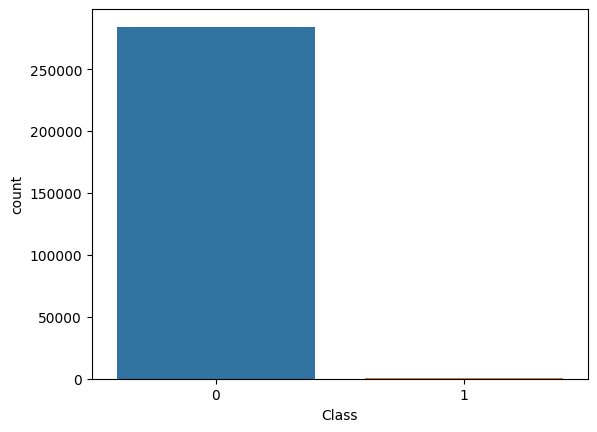

In [ ]:
# Based on this countplot, we see that there are way more real transactions than fraud
sns.countplot(x=data.Class)

<Axes: >

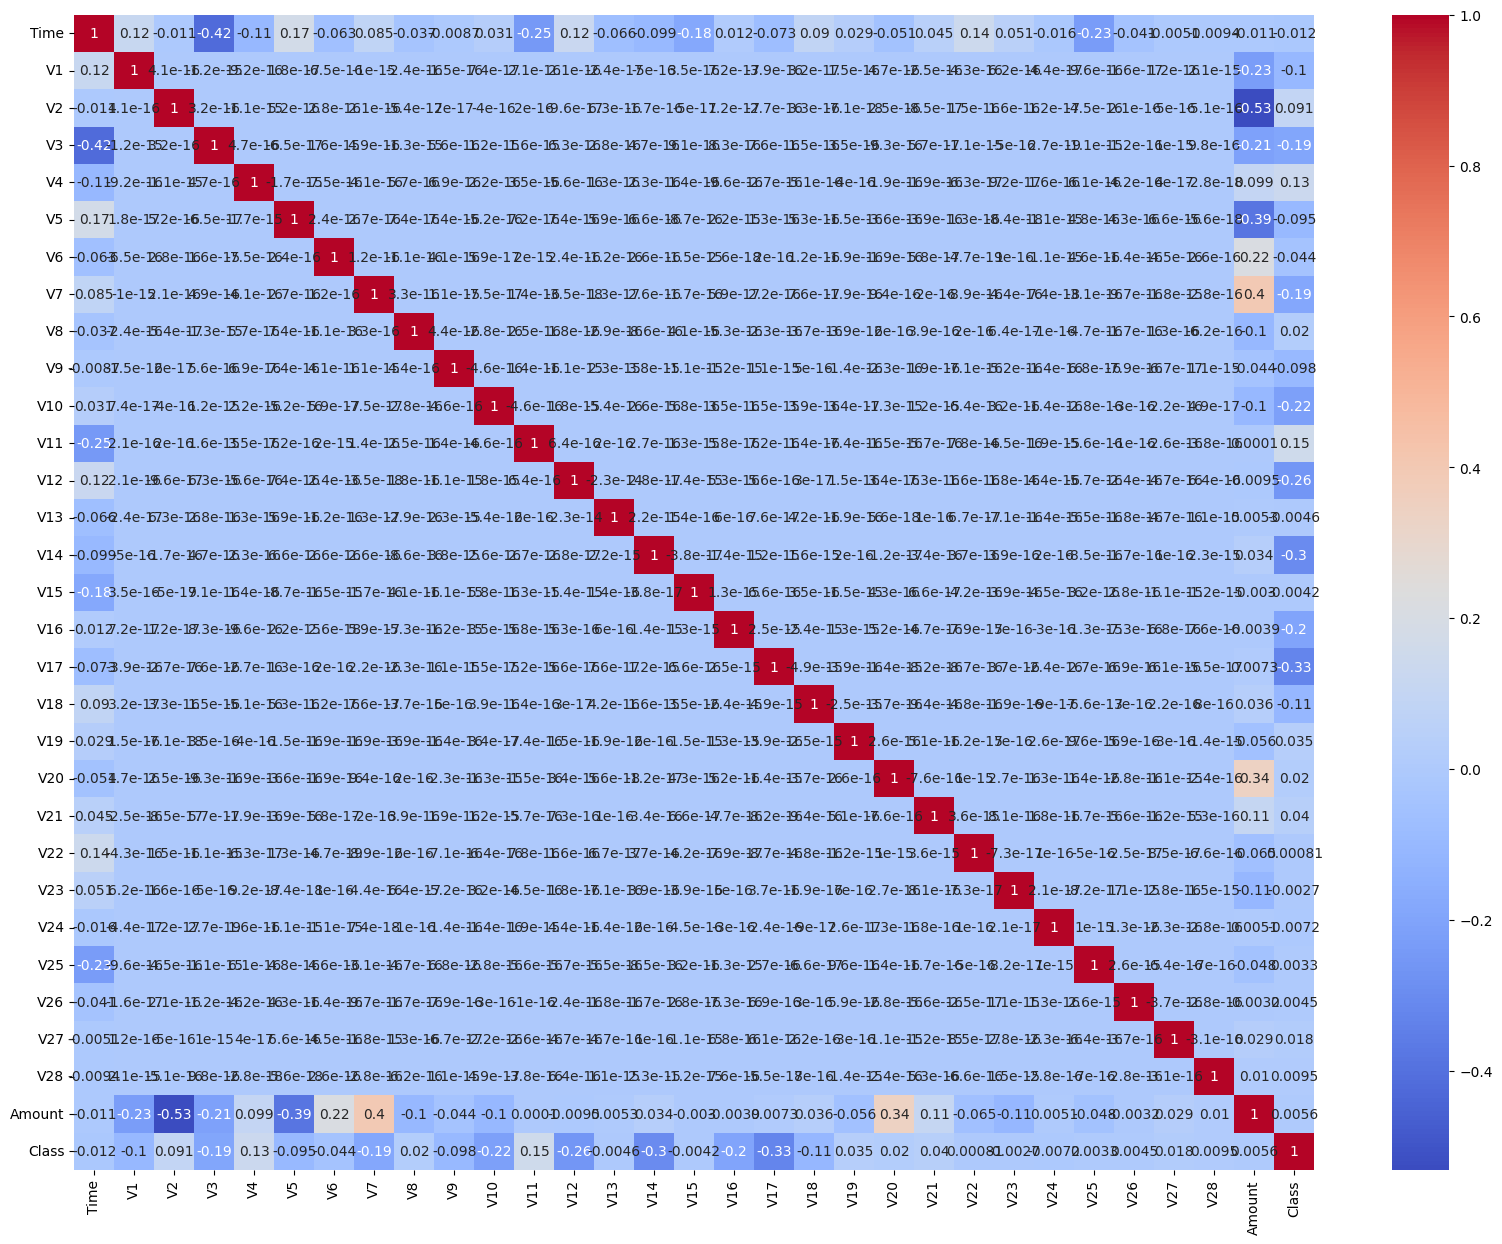

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(data.corr(), cmap = 'coolwarm', annot=True)

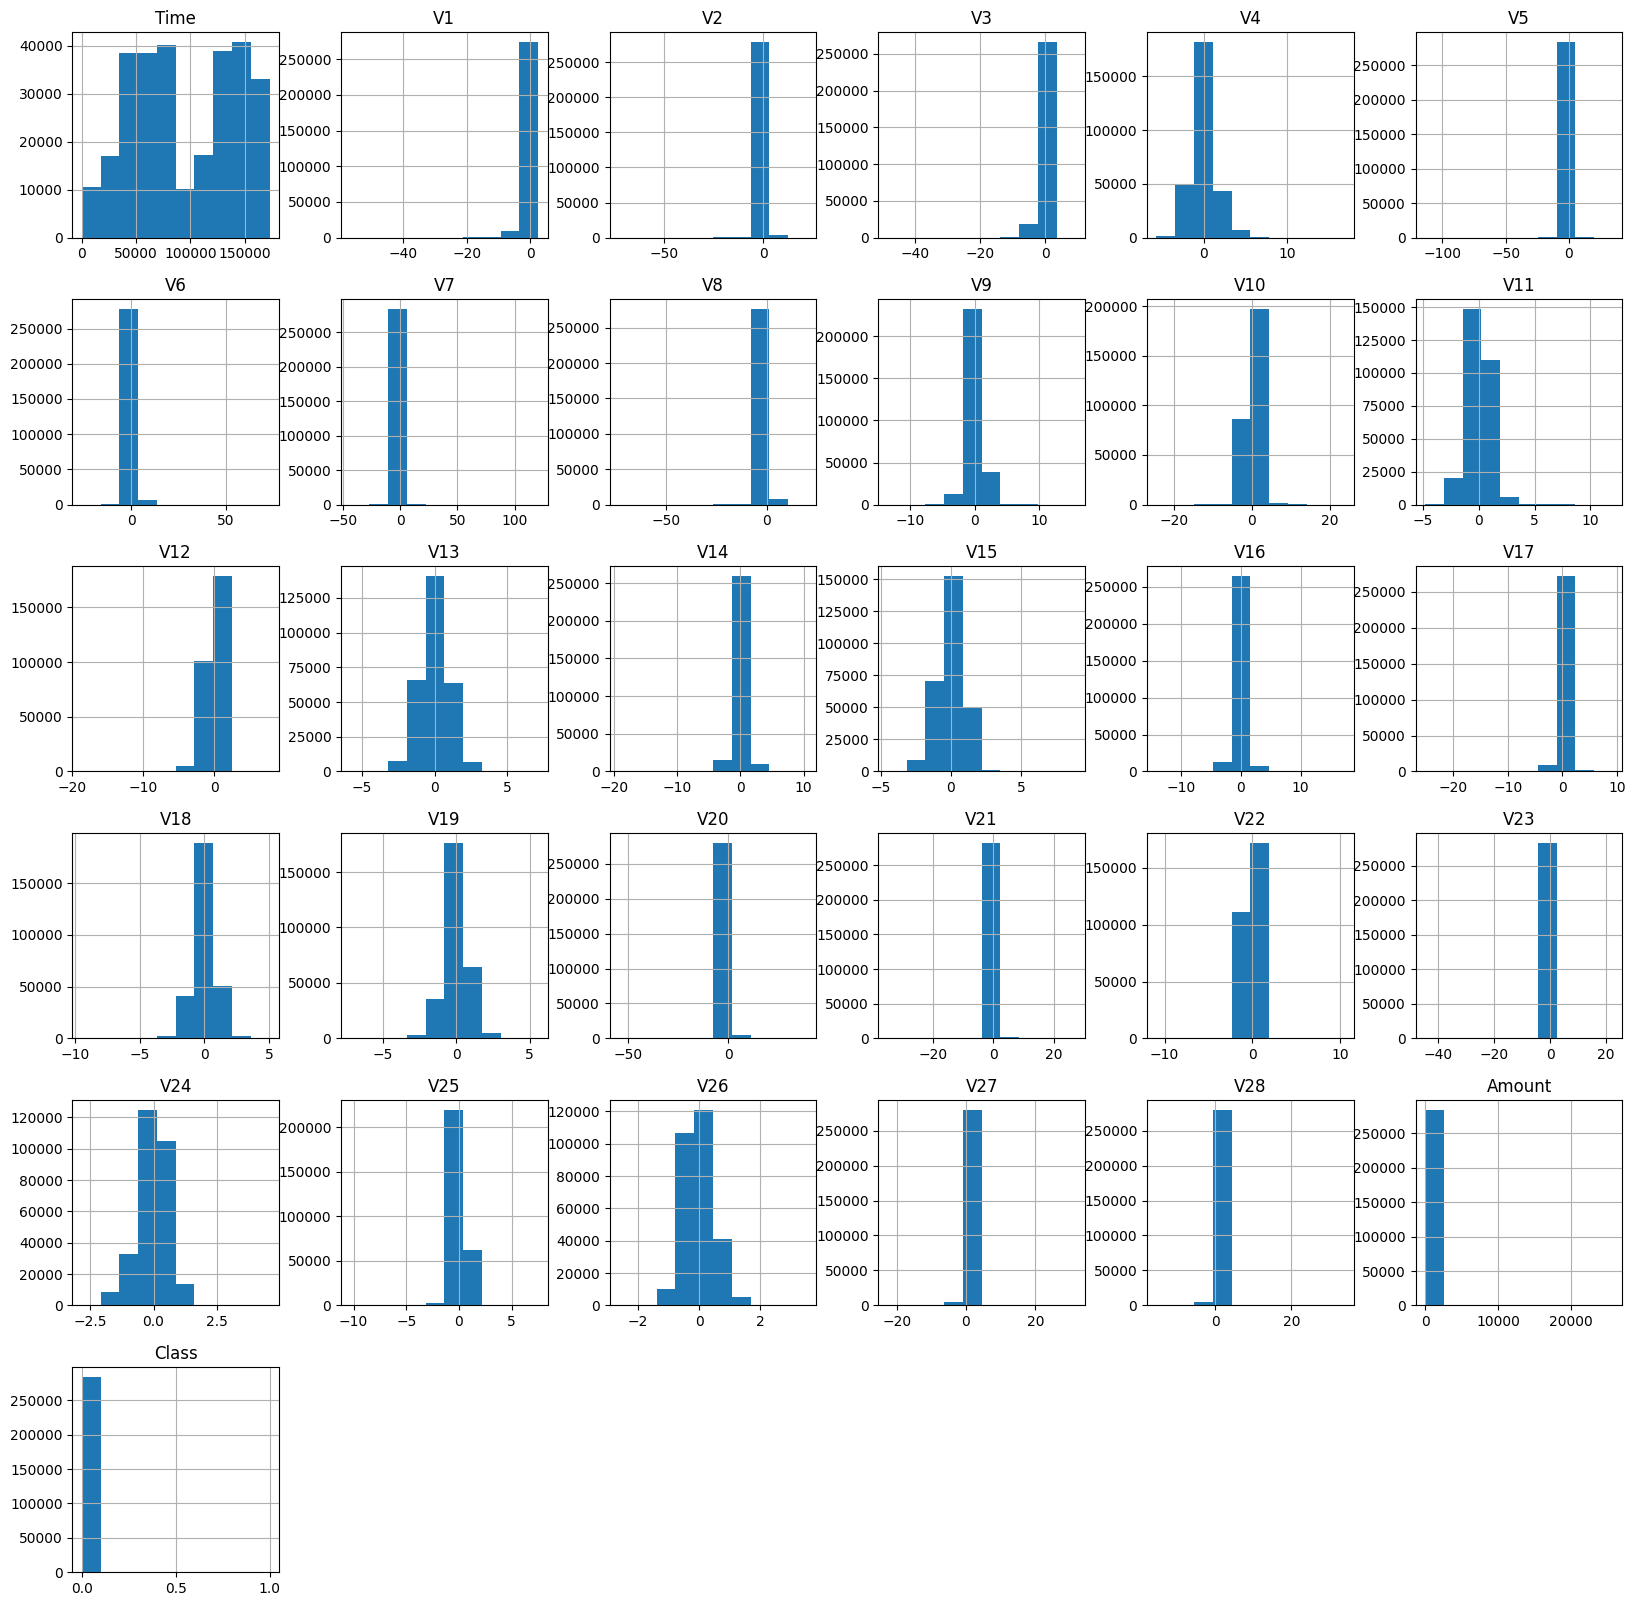

In [ ]:
data.hist(figsize=(20, 20))
plt.show()

Text(0, 0.5, 'Amount')

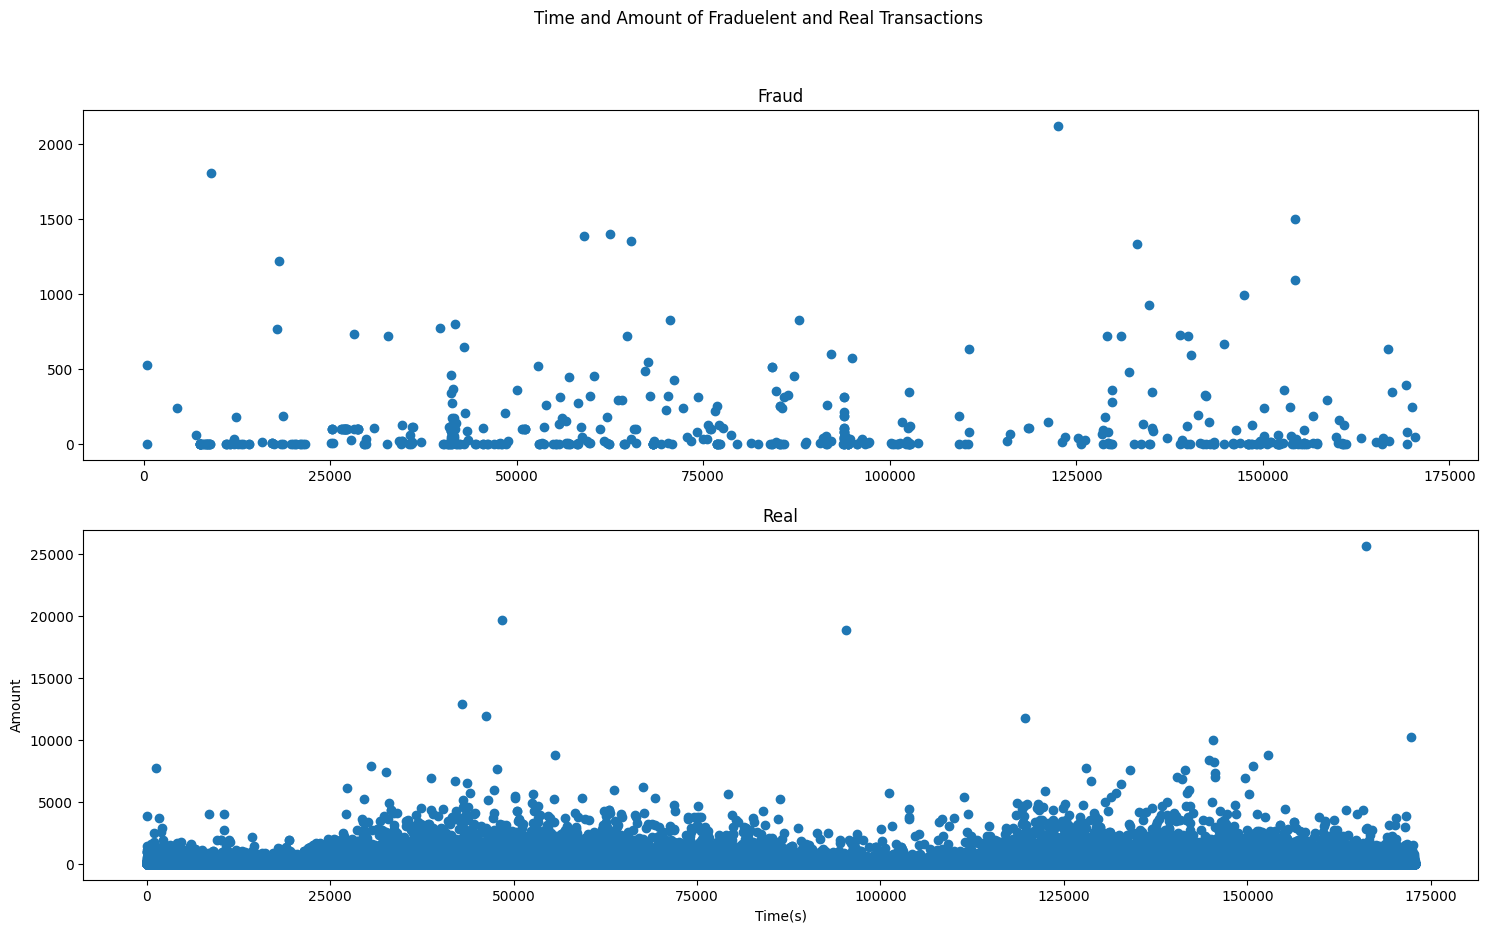

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(18, 10))
fig.suptitle("Time and Amount of Fraduelent and Real Transactions")
ax[0].scatter(fraud.Time, fraud.Amount)
ax[0].set_title("Fraud")
ax[1].scatter(real.Time, real.Amount)
ax[1].set_title("Real")
plt.xlabel("Time(s)")
plt.ylabel("Amount")

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

x = data.drop(columns=['Class'])
y = data.Class

x_resampled, y_resampled = smote.fit_resample(x, y)

<Axes: xlabel='Class', ylabel='count'>

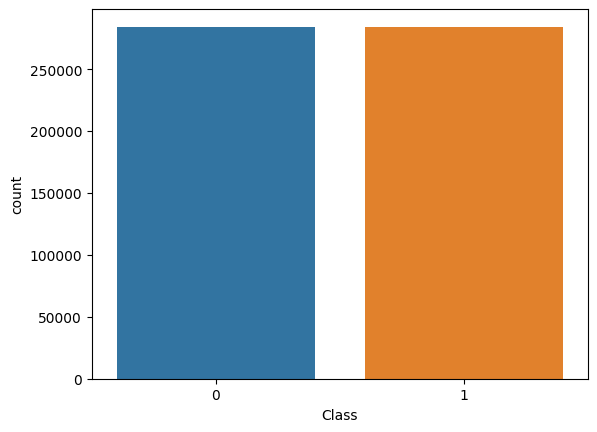

In [ ]:
sns.countplot(x = y_resampled)

In [ ]:
from sklearn.preprocessing import StandardScaler

x = data.drop(columns=['Class'])
y = data.Class

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x_resampled)

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

x = data.drop(columns=['Class'])
y = data.Class

iso = IsolationForest(n_estimators=100)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

iso.fit(x_train)

y_pred = iso.predict(x_test)

y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

In [ ]:
error = (y_pred != y_test).sum()
correct = (y_pred == y_test).sum()
total = error + correct

print(f"Error of Isolation forest is {error / total}")
print(f"Number of Correctly Predicted Values is {correct / total}")

Error of Isolation forest is 0.035427126856500825
Number of Correctly Predicted Values is 0.9645728731434992


<Axes: >

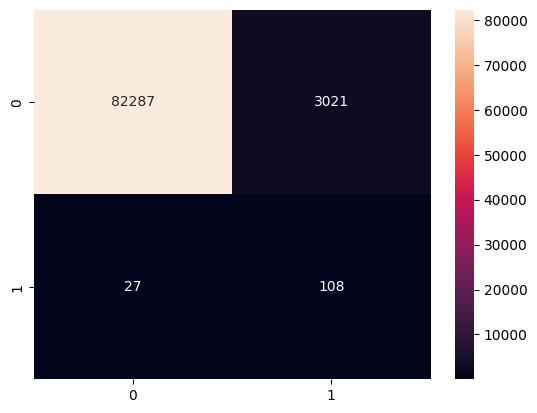

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt='d')

In [ ]:
from sklearn.metrics import average_precision_score

average_precision_score(y_test, y_pred)

0.02811522793967231

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log = LogisticRegression()

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size = 0.3, random_state=1)

log.fit(x_train, y_train)

y_pred = log.predict(x_test)

accuracy_score(y_pred, y_test)

0.9719208155273786

<Axes: >

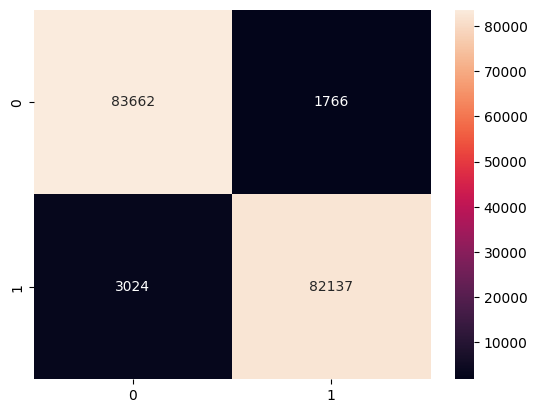

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), fmt='d', annot=True)